##### This notebook focuses EDA 
##### TicketMaster data which involves the following:
        working with date-time columns
        exploring the various columns in the data

##### Yelp data which involves:
        merging the venue ratings and POI ratings data
        exploring the data frames for the yelp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ticket master Data

### Pre-processing

In [2]:
TicketMaster_data=pd.read_csv('TicketMaster_merged.csv')

In [3]:
TicketMaster_data.head()

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility
0,Matt Weidinger,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-21T00:00:00Z,Farm League Brewing,Cambridge,Ontario,295 Ainslie Street S,43.351280,-80.313180,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
1,"Enterprise Earth w/ Inferi, Crown Magnetar & T...",Rock,2024-04-20,18:00:00,America/Edmonton,2024-04-21T00:00:00Z,Dickens Pub,Calgary,Alberta,1000 9th Avenue SW,51.045486,-114.083990,This event is 18 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
2,Now In Service,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-25T00:00:00Z,Under the Neon Palms at the El Mocambo,Toronto,Ontario,464 Spadina Avenue,43.657580,-79.400200,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
3,House of Summon Presents: Woo York Live (After...,Dance/Electronic,2024-04-20,22:00:00,America/Toronto,2024-04-21T02:00:00Z,Grand Bizarre Exhibition Place,Toronto,Ontario,15 Saskatchewan Rd,43.632598,-79.423739,This event is 19 and over. Any ticket holder u...,No ticket limit information available,NaN,NaN,NaN
4,Korpiklaani w/ Visions of Atlantis & ILLUMISHADE,Metal,2024-04-20,18:00:00,America/Edmonton,2024-04-21T00:00:00Z,The Starlite Room,Edmonton,Alberta,10030 – 102 Street,53.546218,-113.490371,NaN,No ticket limit information available,NaN,NaN,NaN


In [4]:
TicketMaster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Event_name          1806 non-null   object 
 1   Event_type          1805 non-null   object 
 2   Event_dates         1806 non-null   object 
 3   Event_start_times   1773 non-null   object 
 4   Event_time_zone     1806 non-null   object 
 5   Purchase_end_dates  1785 non-null   object 
 6   Venues              1806 non-null   object 
 7   City                1806 non-null   object 
 8   States              1806 non-null   object 
 9   Address             1806 non-null   object 
 10  Latitude            1804 non-null   float64
 11  Longitude           1804 non-null   float64
 12  Additional_info     1042 non-null   object 
 13  Ticket_limits       1381 non-null   object 
 14  Age_restrictions    1255 non-null   object 
 15  Parking             937 non-null    object 
 16  Accesi

##### We see that there are numerous columns with null values and we are going to try to deal with the null values in the following coloumns :
        1) Event_type
        2) Event_start_times
        3) Purchase_end_dates
        4) Latitude, longitude
        5) Age_restrictions

##### Other columns with null values are extra information that do not affect the model we are trying to build 


In [5]:
TicketMaster_data['Event_time_zone'].unique()
# convert the unknown from the state available in the data frame
# after exploring the cities in the timezones, the errors can be corrected

array(['America/Toronto', 'America/Edmonton', 'America/Vancouver',
       'America/Winnipeg', 'America/New_York', 'America/Denver',
       'America/Montreal', 'America/Los_Angeles', 'Unknown',
       'America/Chicago', 'America/Swift_Current', 'America/Halifax',
       'Europe/Istanbul', 'America/Regina', 'America/St_Johns'],
      dtype=object)

In [6]:
# check cities in all timezones
events= TicketMaster_data[TicketMaster_data['Event_time_zone'] == 'America/Denver']

# Print the cities of events in the time zone
for city in events['City'].unique():
    print(city)

Calgary
Edmonton


In [7]:
# replace the errors found in  mapping_dict back in the main data frame 
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Denver', 'America/Edmonton')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/New_York', 'America/Toronto')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Montreal', 'America/Toronto')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Los_Angeles', 'America/Vancouver')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Chicago', 'America/Winnipeg')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('America/Swift_Current', 'America/Regina')
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].replace('Europe/Istanbul', 'America/Toronto')

In [8]:
# Replace 'Montr??al' with 'Montreal' in the 'City' column of the DataFrame
TicketMaster_data['City'] = TicketMaster_data['City'].replace('Montr??al', 'Montréal')


In [9]:
# To create a mapping dictionary 
mapping_dict={}
for index, row in TicketMaster_data[['City', 'Event_time_zone']].drop_duplicates().iterrows():
    city = row['City']
    timezone = row['Event_time_zone']
    if city in mapping_dict :
        if timezone != 'Unknown':
        
             mapping_dict[city] = timezone
        
    
    else:
        if timezone == 'Unknown':
             mapping_dict[city] = 'N/A' # for it to recognise in pandas
        else:
            mapping_dict[city] = timezone
mapping_dict

{'Cambridge': 'America/Toronto',
 'Calgary': 'America/Edmonton',
 'Toronto': 'America/Vancouver',
 'Edmonton': 'America/Edmonton',
 'Vernon': 'America/Vancouver',
 'Winnipeg': 'America/Winnipeg',
 'Vancouver': 'America/Vancouver',
 'Oshawa': 'America/Toronto',
 'Kitchener': 'America/Toronto',
 'Ottawa': 'America/Toronto',
 'Montreal': 'America/Toronto',
 'Hamilton': 'America/Toronto',
 'Niagara Falls': 'America/Toronto',
 'Victoria': 'America/Vancouver',
 'Kelowna': 'America/Vancouver',
 'Red Deer': 'America/Edmonton',
 'Laval': 'America/Toronto',
 'Peterborough': 'America/Toronto',
 'Sudbury': 'America/Toronto',
 'Saskatoon': 'America/Regina',
 'London': 'America/Toronto',
 'St Catharines': 'America/Toronto',
 'Kamloops': 'America/Vancouver',
 'GATINEAU': 'America/Toronto',
 'Laprairie': 'America/Toronto',
 'Québec': 'America/Toronto',
 'Brossard': 'America/Toronto',
 'Moncton': 'America/Halifax',
 'Pickering': 'America/Toronto',
 'Windsor': 'America/Toronto',
 'Brampton': 'America/To

In [10]:
# Replace the unknown values using mapping_dict
# Iterate over the DataFrame
for index, row in TicketMaster_data.iterrows():
    city = row['City']
    timezone = row['Event_time_zone']
    
    # Check if the timezone is unknown and if the city is in the mapping_dict
    if timezone == 'Unknown' and city in mapping_dict:
        # Replace the unknown timezone with the corresponding timezone from mapping_dict
        TicketMaster_data.at[index, 'Event_time_zone'] = mapping_dict[city]

In [11]:
TicketMaster_data.groupby('Event_time_zone')['Event_time_zone'].count()

Event_time_zone
America/Edmonton      273
America/Halifax        51
America/Regina         33
America/St_Johns        2
America/Toronto      1029
America/Vancouver     212
America/Winnipeg      200
N/A                     6
Name: Event_time_zone, dtype: int64

In [12]:
# since its only 6 rows of data with unknown timezone and that data has a lot of missing values we can just drop those rows

TicketMaster_data=TicketMaster_data.drop(TicketMaster_data[TicketMaster_data['Event_time_zone']=='N/A'].index)

In [13]:
TicketMaster_data['Purchase_end_dates'].isna().sum()

21

In [14]:
# Change the purchase end datetime object into the timezone provided 
new_time_zone=[]
import pytz
from datetime import datetime

for index,row in TicketMaster_data.iterrows():
    date_str=row['Purchase_end_dates'] #type object
    time_zone=row['Event_time_zone'] # type object
    
    if pd.notna(date_str):  # Check if the date string is not 'NaN 
    # Convert the datetime string to a datetime object
        datetime_obj_utc = datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%SZ')

    # Normalize to UTC timezone before converting to the required timezone
        datetime_obj_utc=datetime_obj_utc.replace(tzinfo=pytz.utc) 

     # Define the event time zone
        event_timezone = pytz.timezone(time_zone)

    # Convert the purchase end date to the event time zone
        Purchase_End_Date = datetime_obj_utc.astimezone(event_timezone)
    
    # Convert the purchase end date to a string without timezone information
        purchase_end_date_str = Purchase_End_Date.strftime('%Y-%m-%d %H:%M:%S')

    # Append the datetime object without timezone to the list
        new_time_zone.append(purchase_end_date_str)
    else:
        new_time_zone.append(None)  # Append None if date_str is 'N/A'




In [15]:
# Add the converted time zone back to the data frame
TicketMaster_data['Converted_Purchase_end_dates']=new_time_zone



In [16]:
# change data types for the columns

TicketMaster_data['Event_name'] = TicketMaster_data['Event_name'].astype(str)
TicketMaster_data['Event_type'] = TicketMaster_data['Event_type'].astype(str)
TicketMaster_data['Event_dates'] = pd.to_datetime(TicketMaster_data['Event_dates'])
TicketMaster_data['Event_start_times'] = pd.to_datetime(TicketMaster_data['Event_start_times'], format='%H:%M:%S').dt.time
TicketMaster_data['Event_time_zone'] = TicketMaster_data['Event_time_zone'].astype(str)
TicketMaster_data['Purchase_end_dates'] = pd.to_datetime(TicketMaster_data['Purchase_end_dates'])
TicketMaster_data['Venues'] = TicketMaster_data['Venues'].astype(str)
TicketMaster_data['City'] = TicketMaster_data['City'].astype(str)
TicketMaster_data['States'] = TicketMaster_data['States'].astype(str)
TicketMaster_data['Address'] = TicketMaster_data['Address'].astype(str)
TicketMaster_data['Latitude'] = TicketMaster_data['Latitude'].astype(float)
TicketMaster_data['Longitude'] = TicketMaster_data['Longitude'].astype(float)
TicketMaster_data['Additional_info'] = TicketMaster_data['Additional_info'].astype(str)
TicketMaster_data['Ticket_limits'] = TicketMaster_data['Ticket_limits'].astype(str)
TicketMaster_data['Age_restrictions'] = TicketMaster_data['Age_restrictions'].astype(bool)
TicketMaster_data['Parking'] = TicketMaster_data['Parking'].astype(str)
TicketMaster_data['Accesibility'] = TicketMaster_data['Accesibility'].astype(str)
TicketMaster_data['Converted_Purchase_end_dates']=pd.to_datetime(TicketMaster_data['Converted_Purchase_end_dates'])

In [17]:
TicketMaster_data[TicketMaster_data['Event_start_times'].isna()]

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Converted_Purchase_end_dates
838,COAST CITY COUNTRY Two Day Pass,Country,2024-04-19,NaT,America/Vancouver,2024-04-20 04:00:00+00:00,BC Place,Vancouver,British Columbia,777 Pacific Blvd.,49.276069,-123.112712,nan,There is an overall 8 ticket limit for this ev...,False,Pay parking lots are located adjacent to BC Pl...,Wheelchair seating is located on Levels 2 & 4 ...,2024-04-19 21:00:00
1087,2024 Speedo Canadian Swimming Open/omnium Cana...,Sports,2024-04-10,NaT,America/Toronto,2024-04-14 03:30:00+00:00,Toronto Pan Am Sports Centre,Toronto,Ontario,Military Trail and Morningside Avenue,43.789302,-79.194417,nan,nan,False,nan,nan,2024-04-13 23:30:00
1168,2024 Telus Cup - Full Tournament Package,Sports,2024-04-22,NaT,America/Halifax,2024-04-28 21:00:00+00:00,Membertou Sports & Wellness Centre,Membertou,Nova Scotia,95 Autwen Ma'sl Awti,46.121566,-60.186751,"Capacity: 1,350 / Capacité : 1 350",nan,False,nan,nan,2024-04-28 18:00:00
1212,2024 World Para Ice Hockey Championship - Full...,Sports,2024-05-04,NaT,America/Edmonton,2024-05-12 23:30:00+00:00,WinSport Event Centre,Calgary,Alberta,88 Canada Olympic Road SW,51.082382,-114.215273,nan,nan,False,Ample parking is available on site. There may ...,WinSport is fully wheelchair accessible with a...,2024-05-12 17:30:00
1231,2024 World Para Ice Hockey Championship - Meda...,Sports,2024-05-10,NaT,America/Edmonton,2024-05-12 23:30:00+00:00,WinSport Event Centre,Calgary,Alberta,88 Canada Olympic Road SW,51.082382,-114.215273,Medal round package gives you access to the se...,nan,False,Ample parking is available on site. There may ...,WinSport is fully wheelchair accessible with a...,2024-05-12 17:30:00
1250,Passe pour l'évènement complet (7 jours) / Ful...,Sports,2024-05-13,NaT,America/Toronto,2024-05-20 01:00:00+00:00,Centre sportif du Parc olympique,Montreal,Quebec,3200 Rue Viau,45.559972,-73.551438,La passe pour l'événement complet vous donne a...,nan,False,nan,nan,2024-05-19 21:00:00
1255,Toronto Ultra Major III Powered by Bell - 4-Da...,Sports,2024-05-16,NaT,America/Toronto,2024-05-19 18:00:00+00:00,Mattamy Athletic Centre,Toronto,Ontario,50 Carlton Street,43.662182,-79.380370,"Net Capacity: 2,560 Must be 17+ unless accompa...",nan,False,There are several paid public parking lots in ...,The Mattamy Athletic Centre has Accessible Sea...,2024-05-19 14:00:00
1261,Passe pour la fin de semaine (3 jours) - Weeke...,Sports,2024-05-17,NaT,America/Toronto,2024-05-20 01:00:00+00:00,Centre sportif du Parc olympique,Montreal,Quebec,3200 Rue Viau,45.559972,-73.551438,La passe pour la fin de semaine vous donne acc...,nan,False,nan,nan,2024-05-19 21:00:00
1316,RBCCO Early Week Any One Day - Tues or Wed,Sports,2024-05-28,NaT,America/Toronto,2024-05-29 22:00:00+00:00,Hamilton Golf and Country Club,Ancaster,Ontario,232 Golf Links Road,43.221489,-79.976978,"Net capacity: (20,000)",There is an 8 ticket limit for this event.,False,Please follow the signs for parking More infor...,Accessible Viewing: Private viewing areas on t...,2024-05-29 18:00:00
1367,Canadian Grand Prix,Sports,2024-06-09,NaT,America/Toronto,2024-06-10 03:59:20+00:00,Circuit Gilles-Villeneuve,Montréal,Quebec,1 Circuit Gilles Villeneuve,0.000000,0.000000,nan,nan,True,nan,nan,2024-06-09 23:59:20


#### from the dataframe we are going to use the time information in the purchase end dates to fill the start time information 


In [18]:
for index,row in TicketMaster_data.iterrows():
     # Check if 'Event_start_times' is NaN and 'Converted_Purchase_end_dates' is not NaT
    if pd.isna(row['Event_start_times']) and not pd.isna(row['Converted_Purchase_end_dates']):
        TicketMaster_data.at[index, 'Event_start_times'] = row['Converted_Purchase_end_dates'].time()
    

In [19]:
TicketMaster_data[TicketMaster_data['Event_start_times'].isna()]

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Converted_Purchase_end_dates
1454,PWHL Season Tickets,Sports,2024-01-01,NaT,America/Toronto,NaT,Mattamy Athletic Centre,Toronto,Ontario,50 Carlton Street,43.662182,-79.38037,Net Capacity: 2740,There is an 8 ticket limit for this event.,False,There are several paid public parking lots in ...,The Mattamy Athletic Centre has Accessible Sea...,NaT


In [20]:
# Since there is only one row of data with no event start times we can drop that row
TicketMaster_data=TicketMaster_data.drop(TicketMaster_data[TicketMaster_data['Event_start_times']=='NaT'].index)

#### We saw that age_restrictions has some null values Check for age restrictions information in additional info and make changes to the data accordingly.
I will use NLTK library to parse the string and look for relevant tokens ( numbers (18,19) ,'and older','+','plus','no minors')

In [21]:
TicketMaster_data['Age_restrictions'].unique()

array([ True, False])

In [22]:
import nltk
import re
import numpy as np

# Assuming TicketMaster_data is your DataFrame and 'Info' is the column containing text data
# Import NLTK's word_tokenize and FreqDist
from nltk.tokenize import word_tokenize

# Download the punkt tokenizer
#nltk.download('punkt')

# Define a function to extract digits and detect keywords
def extract_digits_and_detect_keywords(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    items_to_check = ['and over', '+', 'plus', 'nominors']
    
    # Initialize boolean values for digits and keywords
    has_digits = any(token.isdigit() for token in tokens)
    # Check if any of the items in the list are present in the tokens
    # Lowercase the text for case-insensitive comparison
    text_lower = text.lower()
    
    # Check if any of the items in the list are present in the text
    # This checks for phrases in the original text
    has_keywords = any(item in text_lower for item in items_to_check)
    
    return has_digits, has_keywords

# Define a function to apply the extraction and assign 'Age Restriction'
def apply_extraction(row):
    # Check if 'Additional_info' is NaN without altering existing 'Age_restrictions' values
    if pd.isnull(row['Additional_info']):
        # If 'Age_restrictions' is NaN, then set it to False, otherwise leave it as is
        if pd.isnull(row['Age_restrictions']):
            row['Age_restrictions'] = False
        # No further action needed if 'Age_restrictions' already has a value
    else:
        has_digits, has_keywords = extract_digits_and_detect_keywords(row['Additional_info'])
        
        # Check if both digits and keywords are present
        if has_digits and has_keywords:
            row['Age_restrictions'] = True
        else:
            row['Age_restrictions'] = False
    
    return row
    
# Apply the extraction function to each row
TicketMaster_data= TicketMaster_data.apply(apply_extraction, axis=1)


In [23]:
TicketMaster_data.head()

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Converted_Purchase_end_dates
0,Matt Weidinger,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-21 00:00:00+00:00,Farm League Brewing,Cambridge,Ontario,295 Ainslie Street S,43.351280,-80.313180,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 20:00:00
1,"Enterprise Earth w/ Inferi, Crown Magnetar & T...",Rock,2024-04-20,18:00:00,America/Edmonton,2024-04-21 00:00:00+00:00,Dickens Pub,Calgary,Alberta,1000 9th Avenue SW,51.045486,-114.083990,This event is 18 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 18:00:00
2,Now In Service,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-25 00:00:00+00:00,Under the Neon Palms at the El Mocambo,Toronto,Ontario,464 Spadina Avenue,43.657580,-79.400200,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-24 20:00:00
3,House of Summon Presents: Woo York Live (After...,Dance/Electronic,2024-04-20,22:00:00,America/Toronto,2024-04-21 02:00:00+00:00,Grand Bizarre Exhibition Place,Toronto,Ontario,15 Saskatchewan Rd,43.632598,-79.423739,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 22:00:00
4,Korpiklaani w/ Visions of Atlantis & ILLUMISHADE,Metal,2024-04-20,18:00:00,America/Edmonton,2024-04-21 00:00:00+00:00,The Starlite Room,Edmonton,Alberta,10030 – 102 Street,53.546218,-113.490371,nan,No ticket limit information available,False,nan,nan,2024-04-20 18:00:00


In [24]:
TicketMaster_data['Age_restrictions'].unique()

array([ True, False])

### EDA Visuals

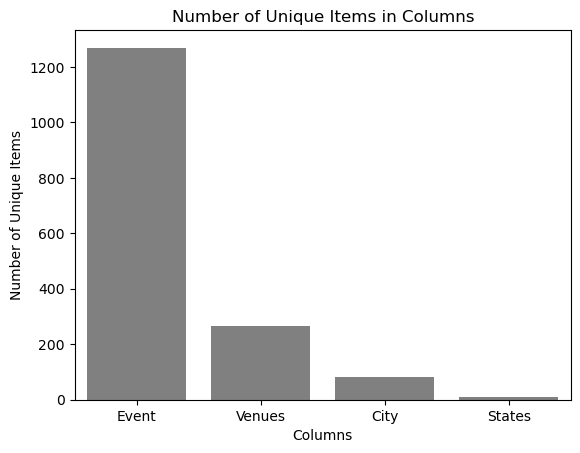

In [25]:
warnings.filterwarnings('ignore')
figsize=(10,20)
unique_events= len(TicketMaster_data['Event_name'].unique())
unique_venues = len(TicketMaster_data['Venues'].unique())
unique_cities = len(TicketMaster_data['City'].unique())
unique_states = len(TicketMaster_data['States'].unique())

# Plot the number of unique items in each column
sns.barplot(x=['Event','Venues', 'City', 'States'], y=[unique_events,unique_venues, unique_cities, unique_states],color='grey')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Items')
plt.title('Number of Unique Items in Columns')
plt.show()

##### This plot shows the span of the events over the venues,city and states in Canada

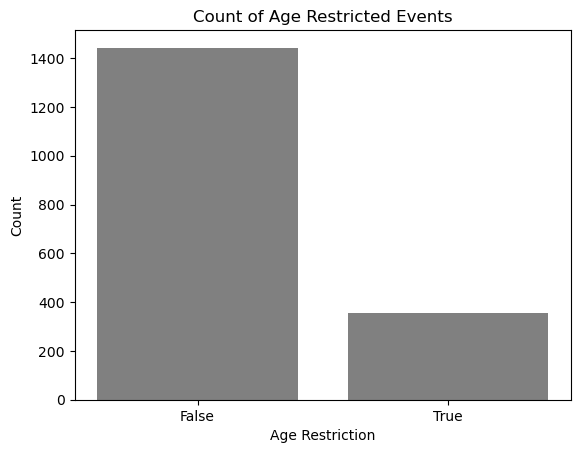

In [26]:
age_restrictions_count=TicketMaster_data['Age_restrictions'].value_counts()

plt.bar(age_restrictions_count.index, age_restrictions_count.values,color='grey')
plt.xlabel('Age Restriction')
plt.ylabel('Count')
plt.title('Count of Age Restricted Events')

# Set the x-axis tick labels to display 'True' and 'False'
# Reverse the index and set the x-axis tick labels accordingly
plt.xticks(age_restrictions_count.index[::-1], age_restrictions_count.index[::-1])

plt.show()

In [27]:
#to see the unique events present in our dataset
event_type_unique = TicketMaster_data['Event_type'].value_counts()
event_type_unique



Event_type
Sports               804
Rock                 312
Dance/Electronic     117
Pop                   85
Hip-Hop/Rap           78
Alternative           70
Metal                 60
Country               54
Undefined             37
Other                 37
World                 27
Folk                  26
Chanson Francaise     26
R&B                   25
Classical             16
Jazz                  11
Latin                  5
Blues                  4
Reggae                 2
Religious              2
Children's Music       1
nan                    1
Name: count, dtype: int64

#### Since we have undefined and other  as event_types we can combine them to create one category and there are 1 NaN items so we can drop those rows as this in a needed feature for the model we are building

In [34]:
# change the catergory of Undefined event type to Awards
TicketMaster_data.replace({'Event_type': {'Undefined': 'Other'}}, inplace=True)

# delete rows of data with NaN values
TicketMaster_data.dropna(subset=['Event_type'], axis=0, inplace=True)



In [29]:
TicketMaster_data.head()

,Event_name,Event_type,Event_dates,Event_start_times,Event_time_zone,Purchase_end_dates,Venues,City,States,Address,Latitude,Longitude,Additional_info,Ticket_limits,Age_restrictions,Parking,Accesibility,Converted_Purchase_end_dates
0,Matt Weidinger,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-21 00:00:00+00:00,Farm League Brewing,Cambridge,Ontario,295 Ainslie Street S,43.351280,-80.313180,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 20:00:00
1,"Enterprise Earth w/ Inferi, Crown Magnetar & T...",Rock,2024-04-20,18:00:00,America/Edmonton,2024-04-21 00:00:00+00:00,Dickens Pub,Calgary,Alberta,1000 9th Avenue SW,51.045486,-114.083990,This event is 18 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 18:00:00
2,Now In Service,Rock,2024-04-20,20:00:00,America/Toronto,2024-04-25 00:00:00+00:00,Under the Neon Palms at the El Mocambo,Toronto,Ontario,464 Spadina Avenue,43.657580,-79.400200,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-24 20:00:00
3,House of Summon Presents: Woo York Live (After...,Dance/Electronic,2024-04-20,22:00:00,America/Toronto,2024-04-21 02:00:00+00:00,Grand Bizarre Exhibition Place,Toronto,Ontario,15 Saskatchewan Rd,43.632598,-79.423739,This event is 19 and over. Any ticket holder u...,No ticket limit information available,True,nan,nan,2024-04-20 22:00:00
4,Korpiklaani w/ Visions of Atlantis & ILLUMISHADE,Metal,2024-04-20,18:00:00,America/Edmonton,2024-04-21 00:00:00+00:00,The Starlite Room,Edmonton,Alberta,10030 – 102 Street,53.546218,-113.490371,nan,No ticket limit information available,False,nan,nan,2024-04-20 18:00:00


In [35]:
TicketMaster_data.drop_duplicates().shape

(1800, 18)

In [36]:
# save the data to a csv
TicketMaster_data.to_csv('TM_data_EDA.csv',index=False)

## FourSquare venue ratings and ticket master venue rating

In [32]:
Venue_ratings=pd.read_csv('Venue_Ratings.csv')
Venue_ratings.head()


,venue,venue_id,city,reviews,ratings
0,Farm League Brewing,Not available,Cambridge,NaN,NaN
1,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,"Good food, great service. The wing night is a ...",5.0
2,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,It's a cheap club with high prices. Expensive ...,1.0
3,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,Food was good and enjoyed are time while havin...,4.0
4,Dickens Pub,SWITg8J1mXRPNFVwHZZwng,Calgary,"El mocambo? More like hell no nah bro. The ""El...",2.0


In [33]:
# Create an empty list to store the average ratings
avg_ratings_list = []

# Iterate over each row in the DataFrame
for index, row in Venue_ratings.iterrows():
    if pd.isna(row['ratings']):
        # Calculate the mode rating for the city
        city_mode_ratings = Venue_ratings.groupby('city')['ratings'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 1)
        # Append the mode rating of the city to the list
        avg_ratings_list.append(round(city_mode_ratings['ratings'], 1) ) # Use get() to handle cases where city is not found
    else:
        # Calculate the mode rating for the venue
        venue_mode_rating = Venue_ratings.groupby('venue')['ratings'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.mean())
        avg_ratings_list.append(round(venue_mode_rating['ratings'], 1))  # Use get() to handle cases where venue is not found

# Add the list as a new column 'avg_ratings' to the DataFrame
Venue_ratings['avg_ratings'] = avg_ratings_list


KeyError: 'ratings'

In [ ]:
Venue_ratings.head()

In [ ]:
# add the average ratings back to the TicketMaster data to give ratings for the venues

for index, row in TicketMaster_data.iterrows():
    # Search for the venue in Venue_ratings DataFrame
    venue_row = Venue_ratings[Venue_ratings['venue'] == row['Venues']]
    # If the venue is found, extract its average rating
    if not venue_row.empty:
        avg_rating = venue_row.iloc[0]['avg_ratings']
        # Assign the average rating to the 'average_ratings' column in TicketMaster_data
        TicketMaster_data.at[index, 'average_ratings'] = avg_rating





In [ ]:
TicketMaster_data